# **Xarray Tutorial**

## **1. Importing Libraries**

In [22]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Generating Synthetic Rainfall and Temperature Datasets**

In [23]:

# Define spatial and temporal dimensions
latitudes = np.linspace(4, 20, 40)   # Latitudes from 4°N to 20°N
longitudes = np.linspace(-10, 10, 50) # Longitudes from 10°W to 10°E
time = pd.date_range("2023-01-01", periods=365, freq="D")  # Daily data for one year

# Create synthetic data arrays
rainfall_data = np.random.uniform(0, 100, (len(time), len(latitudes), len(longitudes)))  # Rainfall in mm
temperature_data = 20 + 10 * np.random.randn(len(time), len(latitudes), len(longitudes))  # Temperature in °C

# Create Xarray Datasets
rainfall_ds = xr.DataArray(
    rainfall_data,
    coords={"time": time, "latitude": latitudes, "longitude": longitudes},
    dims=["time", "latitude", "longitude"],
    name="Rainfall"
).to_dataset()

temperature_ds = xr.DataArray(
    temperature_data,
    coords={"time": time, "latitude": latitudes, "longitude": longitudes},
    dims=["time", "latitude", "longitude"],
    name="Temperature"
).to_dataset()


## **3. Basic Exploration of the Datasets**

### **Display Dataset Structure**

In [24]:

# Display dataset information
print("Rainfall Dataset:")
rainfall_ds.info()

print("\nTemperature Dataset:")
temperature_ds.info()


Rainfall Dataset:
xarray.Dataset {
dimensions:
	time = 365 ;
	latitude = 40 ;
	longitude = 50 ;

variables:
	datetime64[ns] time(time) ;
	float64 latitude(latitude) ;
	float64 longitude(longitude) ;
	float64 Rainfall(time, latitude, longitude) ;

// global attributes:
}
Temperature Dataset:
xarray.Dataset {
dimensions:
	time = 365 ;
	latitude = 40 ;
	longitude = 50 ;

variables:
	datetime64[ns] time(time) ;
	float64 latitude(latitude) ;
	float64 longitude(longitude) ;
	float64 Temperature(time, latitude, longitude) ;

// global attributes:
}

In [25]:

# View dimensions, coordinates, and data variables
print("Rainfall Dataset Dimensions and Coordinates:", rainfall_ds.dims)
print("Temperature Dataset Dimensions and Coordinates:", temperature_ds.dims)

# Display metadata and first few rows
rainfall_ds.Rainfall
temperature_ds.Temperature


Rainfall Dataset Dimensions and Coordinates: FrozenMappingWarningOnValuesAccess({'time': 365, 'latitude': 40, 'longitude': 50})
Temperature Dataset Dimensions and Coordinates: FrozenMappingWarningOnValuesAccess({'time': 365, 'latitude': 40, 'longitude': 50})


<xarray.DataArray 'Temperature' (time: 365, latitude: 40, longitude: 50)> Size: 6MB
array([[[37.25663991, 23.92909231, 30.36317221, ..., 19.57963078,
         12.42595205, 23.96099681],
        [10.80525335, 25.9221162 , 20.99639631, ..., 32.25092928,
         20.92210135, 16.07174606],
        [30.86446063,  9.92380477, 28.6351513 , ..., 22.093892  ,
         31.0178684 ,  7.67023905],
        ...,
        [15.14363695, 28.24418485,  3.93605115, ..., 11.063378  ,
         13.13229915, 31.34186426],
        [12.54521196, 11.55143587, 16.30014934, ...,  7.08560002,
         37.63351869, 27.11324445],
        [41.28147063, 23.24355404, 18.73190233, ..., 28.05917598,
         19.85241786, 16.51561723]],

       [[30.93100219, 39.15151101, 19.2222983 , ..., 19.43759346,
         14.87730794, 14.87698306],
        [16.21379214, 22.19179075, -1.71219947, ..., 27.36780768,
         23.99089602, 16.04687054],
        [17.75145972, 28.10507159, 17.59527855, ..., 23.05566996,
         10.13500896, 44.29058348],
...
        [30.83003291, 11.18175564, 37.61601156, ..., 27.25856288,
         24.50828021, -1.78773761],
        [14.77941676,  4.59008468, 19.95090183, ..., 40.25567483,
         18.24900796, 31.9365101 ],
        [ 8.33955362, 21.32882361, 21.19309974, ..., 21.72528607,
         32.81451179,  9.55913032]],

       [[11.96795198, 11.36962524, 13.59573624, ...,  4.55298275,
         13.25353291, 22.15793263],
        [30.17939499, 26.77251135, 20.9673813 , ..., 18.55484118,
         12.48558535, 10.8685921 ],
        [ 5.68525659,  8.03242923, 24.70070277, ..., 18.88878591,
         25.12688512, 30.30576907],
        ...,
        [18.41381542, 26.10377632, 23.80840478, ..., 29.42808863,
         43.75859449, 17.16280101],
        [28.20024656, 21.75008676, 28.06148155, ..., 22.2560521 ,
         35.70944319, 10.59736425],
        [24.11012607, 32.48076827, 38.88951856, ..., 42.59746044,
          4.46523054, 13.7938586 ]]])
Coordinates:
  * time       (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * latitude   (latitude) float64 320B 4.0 4.41 4.821 5.231 ... 19.18 19.59 20.0
  * longitude  (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.184 9.592 10.0

## **4. Selecting and Indexing Data**

In [26]:

# Select rainfall data for the first day
rainfall_first_day = rainfall_ds.Rainfall.isel(time=0)
print("Rainfall for First Day:\n", rainfall_first_day)

# Select temperature data for a specific latitude and longitude across all days
temperature_specific_location = temperature_ds.Temperature.sel(latitude=10, longitude=0, method="nearest")
print("Temperature at Latitude 10°N, Longitude 0°E:\n", temperature_specific_location)


Rainfall for First Day:
 <xarray.DataArray 'Rainfall' (latitude: 40, longitude: 50)> Size: 16kB
array([[ 6.76523621, 62.94263138, 58.37770776, ..., 14.51857117,
        71.87392196, 94.74808123],
       [32.03144531, 52.01242089, 72.7627887 , ..., 35.77459559,
        70.62481955, 98.539231  ],
       [76.27175092, 24.02317463, 57.58042688, ..., 45.49431834,
        56.24470591, 77.68700277],
       ...,
       [36.68804712, 96.40049301, 98.09574931, ..., 45.89143614,
        43.42982421, 79.90267148],
       [94.77547315, 16.53058796, 27.31378469, ...,  6.84722188,
        21.89784286, 43.82260181],
       [81.82484349, 19.80866474, 92.662821  , ..., 37.56808443,
        29.57656876, 93.36529506]])
Coordinates:
    time       datetime64[ns] 8B 2023-01-01
  * latitude   (latitude) float64 320B 4.0 4.41 4.821 5.231 ... 19.18 19.59 20.0
  * longitude  (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.184 9.592 10.0
Temperature at Latitude 10°N, Longitude 0°E:
 <xarray.DataArray 'Tempera

In [27]:

# Select a subset of data for a specific time period (e.g., January)
rainfall_january = rainfall_ds.Rainfall.sel(time=slice("2023-01-01", "2023-01-31"))
print("Rainfall in January:\n", rainfall_january)


Rainfall in January:
 <xarray.DataArray 'Rainfall' (time: 31, latitude: 40, longitude: 50)> Size: 496kB
array([[[ 6.76523621, 62.94263138, 58.37770776, ..., 14.51857117,
         71.87392196, 94.74808123],
        [32.03144531, 52.01242089, 72.7627887 , ..., 35.77459559,
         70.62481955, 98.539231  ],
        [76.27175092, 24.02317463, 57.58042688, ..., 45.49431834,
         56.24470591, 77.68700277],
        ...,
        [36.68804712, 96.40049301, 98.09574931, ..., 45.89143614,
         43.42982421, 79.90267148],
        [94.77547315, 16.53058796, 27.31378469, ...,  6.84722188,
         21.89784286, 43.82260181],
        [81.82484349, 19.80866474, 92.662821  , ..., 37.56808443,
         29.57656876, 93.36529506]],

       [[71.93006202, 93.94523291,  1.22074273, ...,  1.4681053 ,
         14.2699355 , 41.46328197],
        [68.39593038, 32.02435827, 57.96110201, ..., 68.877949  ,
         61.03989268, 17.45109905],
        [59.30800754, 91.95691716, 68.31126288, ..., 33.71214826,

## **5. Data Manipulation and Aggregation**

### **Calculating Daily, Monthly, and Seasonal Means**

In [30]:

# Calculate daily average temperature over the entire region
daily_avg_temp = temperature_ds.Temperature.mean(dim=["latitude", "longitude"])

# Calculate monthly mean rainfall
monthly_rainfall = rainfall_ds.Rainfall.resample(time="ME").mean()

# Calculate seasonal mean temperature
seasonal_avg_temp = temperature_ds.Temperature.resample(time="QE-AUG").mean()

print("Daily Average Temperature:\n", daily_avg_temp)
print("Monthly Rainfall:\n", monthly_rainfall)
print("Seasonal Average Temperature:\n", seasonal_avg_temp)


Daily Average Temperature:
 <xarray.DataArray 'Temperature' (time: 365)> Size: 3kB
array([19.98640446, 20.18210986, 19.84770335, 19.86191587, 20.09955914,
       19.74129261, 20.1327545 , 20.24355646, 19.20328348, 19.50890166,
       20.18331742, 20.19065415, 20.39839239, 19.78250485, 20.42537541,
       19.82331167, 19.88847937, 19.9592318 , 19.75751068, 20.36447964,
       19.84916728, 20.02119479, 19.78267879, 20.19593287, 20.24762578,
       19.80050753, 20.10362617, 19.75689635, 20.17744009, 19.90048766,
       19.40319842, 19.71206286, 19.89119289, 20.29870282, 19.91627649,
       19.93339415, 19.756348  , 20.00466779, 19.79367477, 20.06018913,
       20.09418946, 19.74804705, 19.56292012, 19.80907972, 20.09816034,
       19.7748571 , 19.96827136, 20.11183438, 20.06147115, 19.84532224,
       20.00856839, 19.93210856, 20.21923356, 20.08729893, 19.94520523,
       19.9637064 , 20.18193509, 19.99693087, 19.86515112, 19.89731016,
       19.98746634, 19.62794318, 20.20340362, 19.9493

## **6. Grouping and Reductions**

### **Calculating Max and Min Values**

In [32]:

# Calculate maximum daily rainfall
max_daily_rainfall = rainfall_ds.Rainfall.max(dim="time")
print("Max Daily Rainfall over Time:\n", max_daily_rainfall)

# Calculate minimum temperature for each month
min_monthly_temp = temperature_ds.Temperature.resample(time="ME").min()
print("Min Monthly Temperature:\n", min_monthly_temp)


Max Daily Rainfall over Time:
 <xarray.DataArray 'Rainfall' (latitude: 40, longitude: 50)> Size: 16kB
array([[99.98580936, 99.67142296, 99.85734692, ..., 99.94419901,
        99.56335581, 99.71624773],
       [99.91403431, 99.92737782, 99.35333468, ..., 99.51594921,
        99.96234956, 99.87314736],
       [99.84268423, 99.92735001, 99.92775066, ..., 99.83624891,
        99.86809781, 99.90370486],
       ...,
       [99.63191582, 99.55721014, 99.57028573, ..., 99.9627464 ,
        99.13718545, 99.97598537],
       [99.69795393, 99.6359925 , 99.98371559, ..., 99.92764739,
        99.61235126, 99.80065208],
       [98.80019234, 99.78194295, 99.9653786 , ..., 99.4258644 ,
        99.89068698, 99.84498711]])
Coordinates:
  * latitude   (latitude) float64 320B 4.0 4.41 4.821 5.231 ... 19.18 19.59 20.0
  * longitude  (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.184 9.592 10.0
Min Monthly Temperature:
 <xarray.DataArray 'Temperature' (time: 12, latitude: 40, longitude: 50)> Size: 192kB

## **7. Mathematical Operations**

### **Applying Arithmetic Operations**

In [33]:

# Convert temperature from Celsius to Fahrenheit
temperature_fahrenheit = (temperature_ds.Temperature * 9 / 5) + 32
print("Temperature in Fahrenheit:\n", temperature_fahrenheit)


Temperature in Fahrenheit:
 <xarray.DataArray 'Temperature' (time: 365, latitude: 40, longitude: 50)> Size: 6MB
array([[[ 99.06195183,  75.07236615,  86.65370998, ...,  67.2433354 ,
          54.36671369,  75.12979425],
        [ 51.44945603,  78.65980916,  69.79351335, ...,  90.05167271,
          69.65978244,  60.9291429 ],
        [ 87.55602914,  49.86284859,  83.54327234, ...,  71.7690056 ,
          87.83216312,  45.80643029],
        ...,
        [ 59.2585465 ,  82.83953272,  39.08489207, ...,  51.9140804 ,
          55.63813846,  88.41535567],
        [ 54.58138152,  52.79258457,  61.34026881, ...,  44.75408004,
          99.74033364,  80.80384001],
        [106.30664714,  73.83839728,  65.71742419, ...,  82.50651676,
          67.73435215,  61.72811101]],

       [[ 87.67580394, 102.47271982,  66.60013695, ...,  66.98766823,
          58.77915429,  58.7785695 ],
        [ 61.18482584,  71.94522335,  28.91804095, ...,  81.26205383,
          75.18361284,  60.88436698],
        [

In [34]:

# Define a function to classify rainfall as "Dry" or "Wet"
def classify_rainfall(value):
    return xr.where(value < 50, "Dry", "Wet")

# Apply function to classify rainfall data
rainfall_classification = classify_rainfall(rainfall_ds.Rainfall)
print("Rainfall Classification:\n", rainfall_classification)


Rainfall Classification:
 <xarray.DataArray 'Rainfall' (time: 365, latitude: 40, longitude: 50)> Size: 9MB
array([[['Dry', 'Wet', 'Wet', ..., 'Dry', 'Wet', 'Wet'],
        ['Dry', 'Wet', 'Wet', ..., 'Dry', 'Wet', 'Wet'],
        ['Wet', 'Dry', 'Wet', ..., 'Dry', 'Wet', 'Wet'],
        ...,
        ['Dry', 'Wet', 'Wet', ..., 'Dry', 'Dry', 'Wet'],
        ['Wet', 'Dry', 'Dry', ..., 'Dry', 'Dry', 'Dry'],
        ['Wet', 'Dry', 'Wet', ..., 'Dry', 'Dry', 'Wet']],

       [['Wet', 'Wet', 'Dry', ..., 'Dry', 'Dry', 'Dry'],
        ['Wet', 'Dry', 'Wet', ..., 'Wet', 'Wet', 'Dry'],
        ['Wet', 'Wet', 'Wet', ..., 'Dry', 'Wet', 'Dry'],
        ...,
        ['Dry', 'Wet', 'Wet', ..., 'Wet', 'Wet', 'Wet'],
        ['Dry', 'Dry', 'Dry', ..., 'Wet', 'Dry', 'Dry'],
        ['Dry', 'Wet', 'Dry', ..., 'Wet', 'Wet', 'Wet']],

       [['Wet', 'Wet', 'Wet', ..., 'Wet', 'Wet', 'Wet'],
        ['Dry', 'Wet', 'Dry', ..., 'Wet', 'Dry', 'Wet'],
        ['Wet', 'Wet', 'Wet', ..., 'Dry', 'Wet', 'Dry'],
        

## **8. Combining Datasets**

### **Merging Rainfall and Temperature Data**

In [35]:

# Merge rainfall and temperature datasets into a single dataset
combined_ds = xr.merge([rainfall_ds, temperature_ds])
print("Combined Dataset:\n", combined_ds)


Combined Dataset:
 <xarray.Dataset> Size: 12MB
Dimensions:      (time: 365, latitude: 40, longitude: 50)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * latitude     (latitude) float64 320B 4.0 4.41 4.821 ... 19.18 19.59 20.0
  * longitude    (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.592 10.0
Data variables:
    Rainfall     (time, latitude, longitude) float64 6MB 6.765 62.94 ... 39.03
    Temperature  (time, latitude, longitude) float64 6MB 37.26 23.93 ... 13.79


In [36]:

# Calculate the difference between maximum daily rainfall and maximum daily temperature
max_rainfall_vs_temp = combined_ds.Rainfall.max(dim="time") - combined_ds.Temperature.max(dim="time")
print("Difference between Max Rainfall and Max Temperature:\n", max_rainfall_vs_temp)


Difference between Max Rainfall and Max Temperature:
 <xarray.DataArray (latitude: 40, longitude: 50)> Size: 16kB
array([[54.80146737, 55.87164097, 47.94642446, ..., 50.72590961,
        49.05441376, 49.5615605 ],
       [52.41853325, 32.69131269, 52.72283101, ..., 50.66874148,
        51.68321845, 52.49540878],
       [42.74354876, 50.80977364, 52.20548792, ..., 47.70289614,
        51.06367595, 52.57429397],
       ...,
       [49.48144892, 46.30876147, 47.58482198, ..., 54.49733625,
        50.46449176, 51.37591666],
       [52.32647316, 45.27110029, 51.86336345, ..., 42.84485934,
        50.97240934, 49.70247863],
       [50.80708356, 55.98166327, 51.22749644, ..., 53.16794103,
        49.57810907, 51.49666517]])
Coordinates:
  * latitude   (latitude) float64 320B 4.0 4.41 4.821 5.231 ... 19.18 19.59 20.0
  * longitude  (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.184 9.592 10.0


## **9. Plotting and Visualization**

### **Plotting Time Series**

In [37]:

# Plot daily average temperature over time
daily_avg_temp.plot(label="Daily Avg Temperature")
plt.title("Daily Average Temperature Over Time")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.legend()
plt.show()


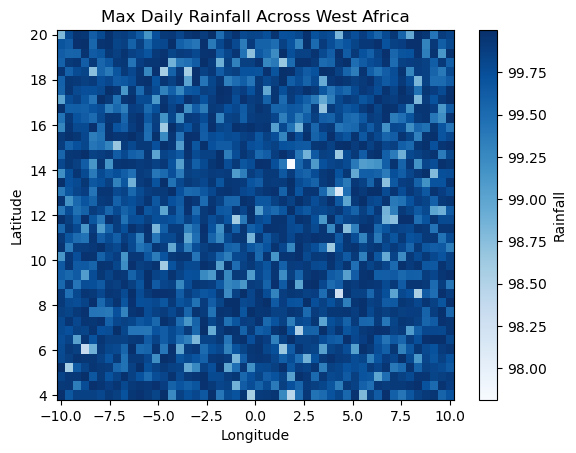

In [38]:

# Plot maximum rainfall over space
max_daily_rainfall.plot(cmap="Blues")
plt.title("Max Daily Rainfall Across West Africa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## **10. Exporting Data**

### **Save Combined Dataset to NetCDF**

In [39]:

# Save combined dataset to NetCDF format
combined_ds.to_netcdf("combined_rainfall_temperature_data.nc")


In [40]:

# Convert daily average temperature to a DataFrame and save as CSV
daily_avg_temp_df = daily_avg_temp.to_dataframe()
daily_avg_temp_df.to_csv("daily_avg_temperature.csv")


## **11. Renaming Variables and Dimensions**

In [41]:

# Rename variable in the Rainfall dataset
rainfall_ds_renamed = rainfall_ds.rename({"Rainfall": "Precipitation"})
print("Renamed Rainfall Dataset Variable:", rainfall_ds_renamed)


Renamed Rainfall Dataset Variable: <xarray.Dataset> Size: 6MB
Dimensions:        (time: 365, latitude: 40, longitude: 50)
Coordinates:
  * time           (time) datetime64[ns] 3kB 2023-01-01 ... 2023-12-31
  * latitude       (latitude) float64 320B 4.0 4.41 4.821 ... 19.18 19.59 20.0
  * longitude      (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.592 10.0
Data variables:
    Precipitation  (time, latitude, longitude) float64 6MB 6.765 62.94 ... 39.03


In [42]:

# Rename dimensions in the Temperature dataset
temperature_ds_renamed = temperature_ds.rename_dims({"latitude": "Y", "longitude": "X"})
print("Renamed Temperature Dataset Dimensions:", temperature_ds_renamed)


Renamed Temperature Dataset Dimensions: <xarray.Dataset> Size: 6MB
Dimensions:      (time: 365, Y: 40, X: 50)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * latitude     (Y) float64 320B 4.0 4.41 4.821 5.231 ... 19.18 19.59 20.0
  * longitude    (X) float64 400B -10.0 -9.592 -9.184 ... 9.184 9.592 10.0
Dimensions without coordinates: Y, X
Data variables:
    Temperature  (time, Y, X) float64 6MB 37.26 23.93 30.36 ... 42.6 4.465 13.79


## **12. Expanding Dimensions**

In [43]:

# Expand temperature dataset by adding a new 'scenario' dimension
temperature_expanded = temperature_ds.expand_dims(scenario=["historical"])
print("Temperature Dataset with Expanded Dimension:", temperature_expanded)


Temperature Dataset with Expanded Dimension: <xarray.Dataset> Size: 6MB
Dimensions:      (scenario: 1, time: 365, latitude: 40, longitude: 50)
Coordinates:
  * scenario     (scenario) object 8B 'historical'
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * latitude     (latitude) float64 320B 4.0 4.41 4.821 ... 19.18 19.59 20.0
  * longitude    (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.592 10.0
Data variables:
    Temperature  (scenario, time, latitude, longitude) float64 6MB 37.26 ... ...


## **13. Aligning Datasets**

In [45]:

# Align rainfall and temperature datasets along time, latitude, and longitude
aligned_rainfall, aligned_temperature = xr.align(rainfall_ds, temperature_ds, join="inner")
print("Aligned Rainfall Dataset:", aligned_rainfall)
print("Aligned Temperature Dataset:", aligned_temperature)


Aligned Rainfall Dataset: <xarray.Dataset> Size: 6MB
Dimensions:    (time: 365, latitude: 40, longitude: 50)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * latitude   (latitude) float64 320B 4.0 4.41 4.821 5.231 ... 19.18 19.59 20.0
  * longitude  (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.184 9.592 10.0
Data variables:
    Rainfall   (time, latitude, longitude) float64 6MB 6.765 62.94 ... 39.03
Aligned Temperature Dataset: <xarray.Dataset> Size: 6MB
Dimensions:      (time: 365, latitude: 40, longitude: 50)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * latitude     (latitude) float64 320B 4.0 4.41 4.821 ... 19.18 19.59 20.0
  * longitude    (longitude) float64 400B -10.0 -9.592 -9.184 ... 9.592 10.0
Data variables:
    Temperature  (time, latitude, longitude) float64 6MB 37.26 23.93 ... 13.79
